In [5]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib

In [7]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Diabetes_prediction\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Drop DiabetesPedigreeFunction for EDA and modeling
df = df.drop('DiabetesPedigreeFunction', axis=1)

# **EDA**

In [11]:
# Check zero values in suspect columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero counts in selected columns:")
print(df[cols_with_zero].eq(0).sum())


Zero counts in selected columns:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


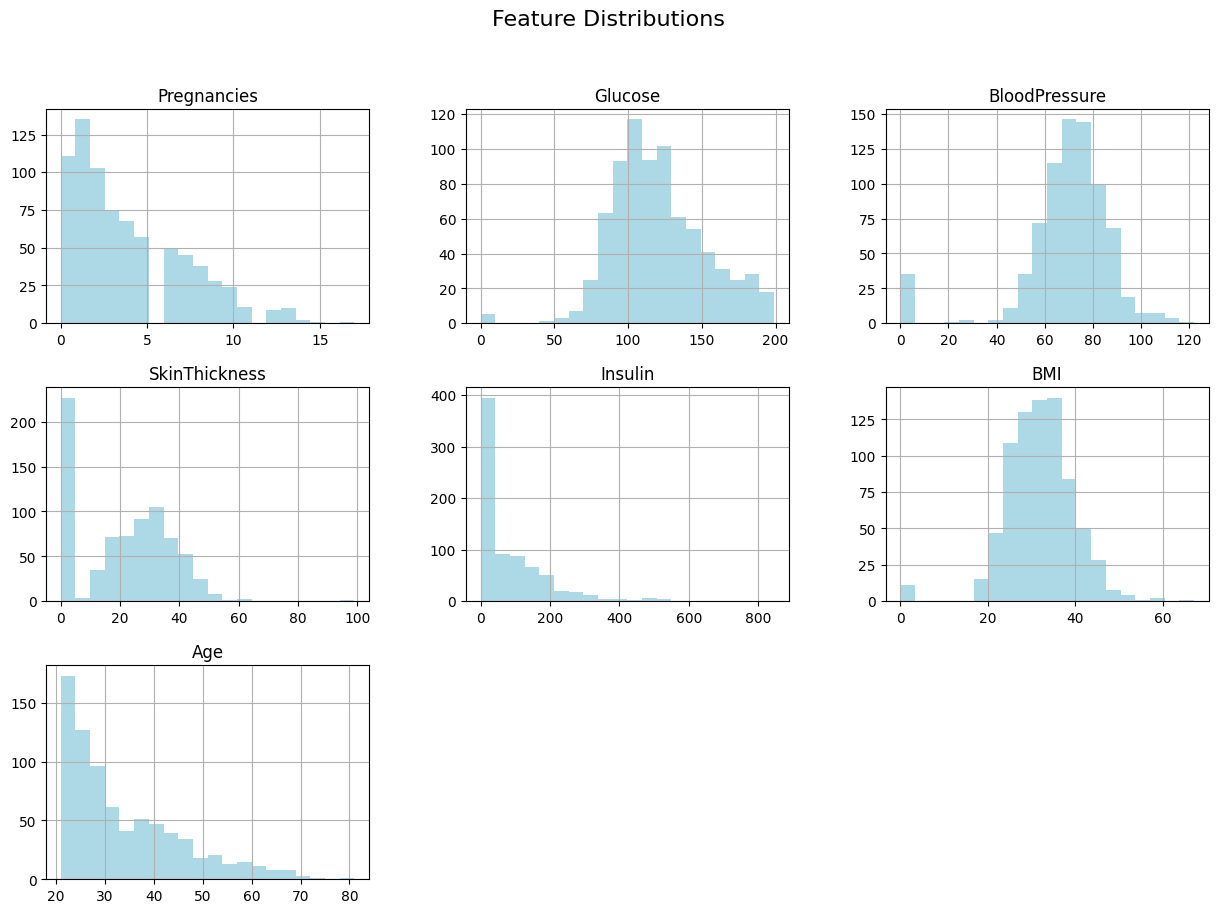

In [12]:
# Histograms
df.drop('Outcome', axis=1).hist(bins=20, figsize=(15, 10), color='lightblue')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

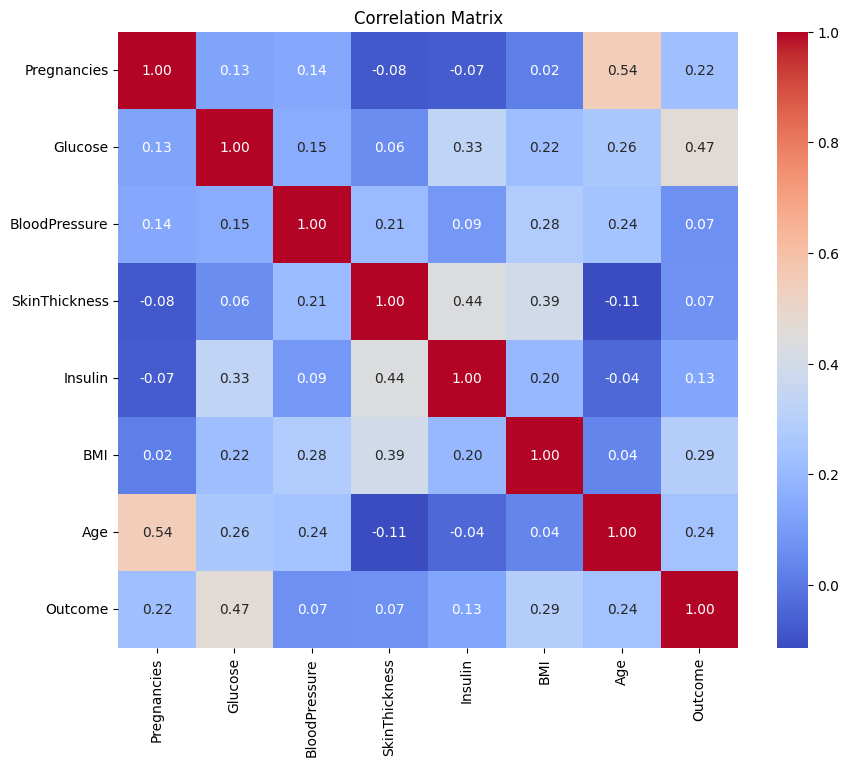

In [13]:
# correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')

In [14]:
# Data preprocessing
df[cols_with_zero] = df[cols_with_zero].replace(0,np.nan)

# fill NA with median
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

In [15]:
# train test splitting
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
# scale the dataset after split
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [18]:
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier(),
          'XGBoost': XGBClassifier(eval_metric = 'logloss')}

In [19]:
accuracies  = {}

for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred = model.predict(x_test_scaled)
  accuracy = accuracy_score(y_test,y_pred)
  accuracies[name] = accuracy

  print(f"\n🔍 Model: {name}")
  print("Accuracy:", accuracy)
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("--------------------------------------------------------------------")

  if name == "Random Forest":
        joblib.dump(model, "random_forest_model.pkl")
        print("✅ Random forest model saved as 'random_forest_model.pkl'")


🔍 Model: Logistic Regression
Accuracy: 0.8311688311688312
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        96
           1       0.83      0.69      0.75        58

    accuracy                           0.83       154
   macro avg       0.83      0.80      0.81       154
weighted avg       0.83      0.83      0.83       154

--------------------------------------------------------------------

🔍 Model: Random Forest
Accuracy: 0.7987012987012987
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        96
           1       0.73      0.74      0.74        58

    accuracy                           0.80       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.80      0.80      0.80       154

--------------------------------------------------------------------
✅ Random forest model saved as 'random_forest_mo

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16368\885641110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette='magma')


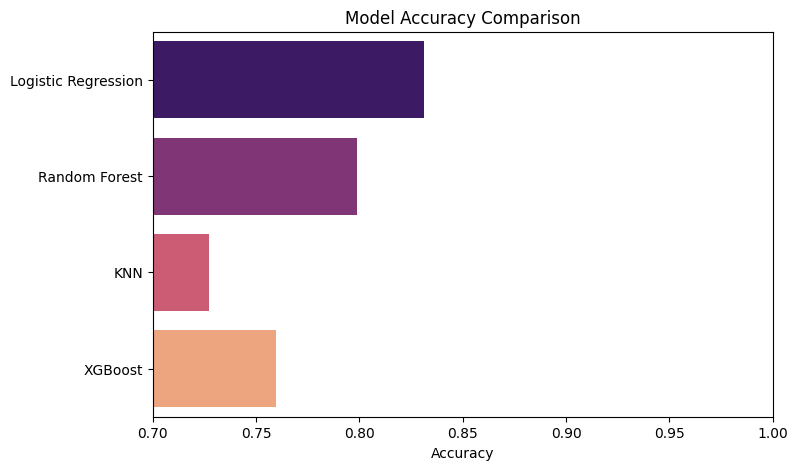

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette='magma')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0.7, 1.0)
plt.show()

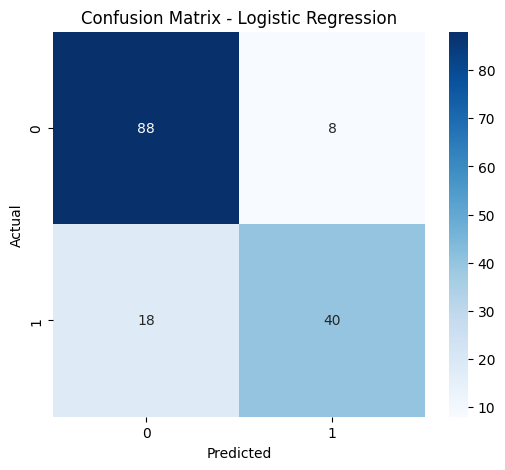

In [21]:
# Confusion Matrix for Best Model

best_model = LogisticRegression()
best_model.fit(x_train_scaled, y_train)
y_pred = best_model.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
import joblib

# Load model and scaler
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example input: Replace with real input later
input_data = [[6.0, 148.0, 72.0, 35.0, 125.0, 33.6, 50.0]]

# Scale the input before prediction
scaled_input = scaler.transform(input_data)

# Make prediction
prediction = model.predict(scaled_input)
prediction


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])